<blockquote> <h3> Project Title </h3> </blockquote>
<h1 style = 'color:#0C73D1;' >  A Linear Regression Model for Predicting Time Required for Extracting Rows </h1>

<h4> Summary : </h4>
The goal of this project was to develop a linear regression model that could accurately predict the time required to extracting/scraping rows based on given inputs. To accomplish this, I have gathered a dataset by doing experiments on webscraping and have recorded time for different row inputs, and used this data to train and test our model. The dataset contains two columns 1. number of  rows and 2. time taken for extarction</b>. After training and testing our model on the dataset, we achieved a high level of accuracy, with a low mean squared error and a high R-squared value. This suggests that our linear regression model is effective at predicting row extraction times and could be a useful tool while webscraping because we will know, how much time it will going to take to execute our request and get the response.

***

In [1]:
# Let's import the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Reset the rcParams to the default values
plt.rcParams.update(plt.rcParamsDefault)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

print('Modules are imported.')

Modules are imported.


In [2]:
# File Path
path = 'ml_project/time_taken.csv'

# Reading csv file using pandas
df = pd.read_csv(path)
df.head()

,number_of_rows,time_taken_in_seconds
0,50,00:00:03
1,100,00:00:05
2,150,00:00:08
3,200,00:00:11
4,250,00:00:13


In [3]:
df.tail()

,number_of_rows,time_taken_in_seconds
53,18000,00:16:12
54,18500,00:16:37
55,19000,00:17:02
56,19500,00:17:25
57,20000,00:17:49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   number_of_rows         58 non-null     int64 
 1   time_taken_in_seconds  58 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


`time_taken_in_seconds` is stored as timestamp, but in string/object format, We need to convert that `time_taken_in_seconds` column in datetime format to extract the seconds and minutes. We will be going to convert the minutes into seconds and add that with the seconds, so we can have only columns of time_taken which is `time_taken_in_seconds`.

In [5]:
# I am using to_datetime method to extract seconds and minutes
df['time_taken_in_seconds'] = pd.to_datetime(df['time_taken_in_seconds']).dt.second + pd.to_datetime(df['time_taken_in_seconds']).dt.minute*60

In [6]:
df.head()

,number_of_rows,time_taken_in_seconds
0,50,3
1,100,5
2,150,8
3,200,11
4,250,13


In [7]:
df.tail()

,number_of_rows,time_taken_in_seconds
53,18000,972
54,18500,997
55,19000,1022
56,19500,1045
57,20000,1069


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   number_of_rows         58 non-null     int64
 1   time_taken_in_seconds  58 non-null     int64
dtypes: int64(2)
memory usage: 1.0 KB


Now, we have both the columns as integers.

In [9]:
df.shape

(58, 2)

In [10]:
df.columns

Index(['number_of_rows', 'time_taken_in_seconds'], dtype='object')

In [11]:
df.describe()

,number_of_rows,time_taken_in_seconds
count,58.000000,58.000000
mean,7224.137931,398.810345
std,6641.194152,364.365946
min,50.000000,3.000000
25%,762.500000,38.750000
50%,5750.000000,318.500000
75%,12875.000000,725.000000
max,20000.000000,1069.000000


In [12]:
df.isnull().sum()

number_of_rows           0
time_taken_in_seconds    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.corr()

,number_of_rows,time_taken_in_seconds
number_of_rows,1.000000,0.999335
time_taken_in_seconds,0.999335,1.000000


# Data Visualization

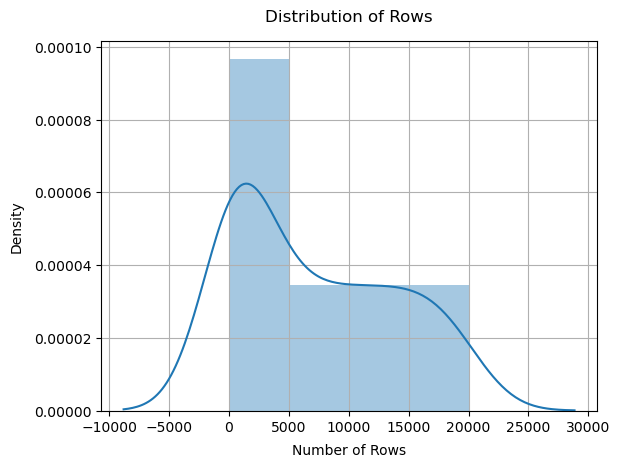

In [15]:
# Let's visualize the distribution of rows
sns.distplot(df['number_of_rows'])
plt.title('Distribution of Rows', pad=14)
plt.xlabel(labelpad=7, xlabel="Number of Rows")
plt.ylabel(labelpad=7, ylabel="Density")
plt.grid()
plt.show()

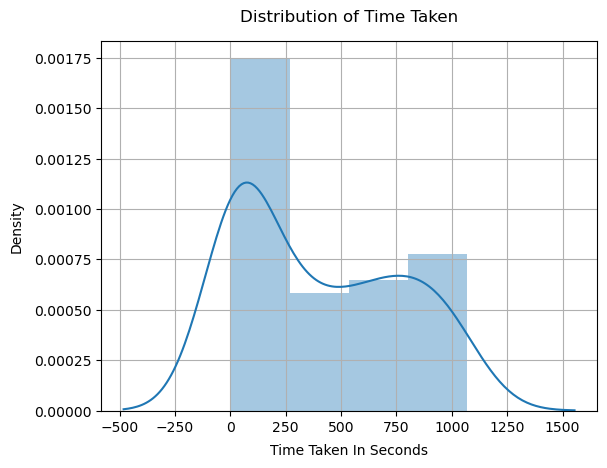

In [16]:
# Let's visualize the distribution of time
sns.distplot(df['time_taken_in_seconds'])
plt.title('Distribution of Time Taken', pad=14)
plt.xlabel(labelpad=7, xlabel="Time Taken In Seconds")
plt.ylabel(labelpad=7, ylabel="Density")
plt.grid()
plt.show()

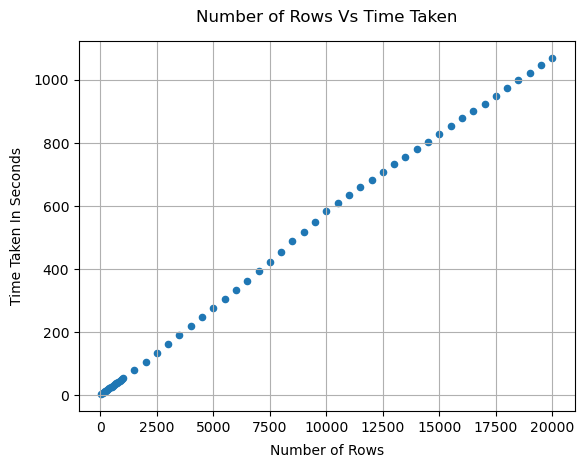

In [17]:
# Let's visualize the relationship between both variables
df.plot(kind='scatter', x='number_of_rows', y='time_taken_in_seconds')
plt.title("Number of Rows Vs Time Taken", pad=14)
plt.xlabel(labelpad=7, xlabel="Number of Rows")
plt.ylabel(labelpad=7, ylabel="Time Taken In Seconds")
plt.grid()
plt.show()

The plots shows that, the variables are positively correlated.

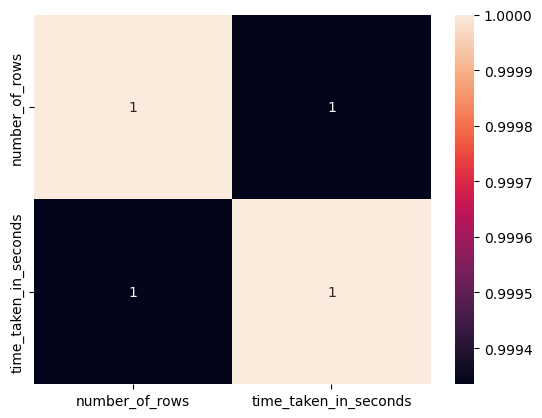

In [18]:
# Let's visualize the correlation using heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

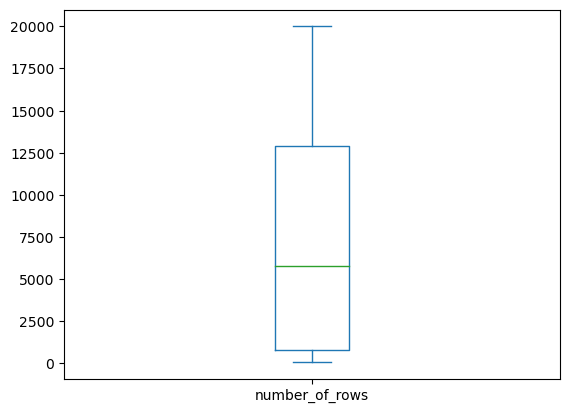

In [19]:
# Let's visualize the data using box plot to see any outliers
df.plot(kind='box', y='number_of_rows')
plt.show()

There is no outliers in number of time taken in seconds column.

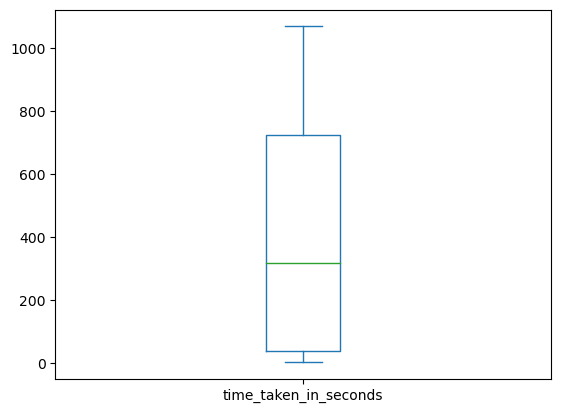

In [20]:
# Let's visualize the data using box plot to see any outliers
df.plot(kind='box', y='time_taken_in_seconds')
plt.show()

There is no outliers in number of  rows column.

## Spliting Data Into Independent & Dependent Variables

In [21]:
X = np.array(df['number_of_rows'].values).reshape(-1, 1) # Independent variable - 2d array
(X[:5])

array([[ 50],
       [100],
       [150],
       [200],
       [250]], dtype=int64)

In [22]:
y = np.array(df['time_taken_in_seconds'].values).reshape(-1, 1) # Dependent variable - 2d array
y[:5]

array([[ 3],
       [ 5],
       [ 8],
       [11],
       [13]], dtype=int64)

## Spliting Data Into Training & Testing Subsets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Let's check the number of rows in training and testing subset
print(f"Training data have {X_train.shape[0]} rows.")
print(f"Testing data have {X_test.shape[0]} rows.")

Training data have 40 rows.
Testing data have 18 rows.


There are totat 58 rows and using train test split, the data is splitted into 40 and 18 rows, training and testing subset respectively.

In [24]:
# Importing linear model from scikit learn
import numpy as np
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model on training subset
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Let's check the accuracy of our model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# let's make predictions on our testing data
y_pred = model.predict(X_test)

# Compute the accuracy score
r2 = r2_score(y_test, y_pred)
print(f"Accuracy score: {r2:.2f}")

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

# Compute the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean absolute error: {mae:.2f}")

Accuracy score: 1.00
Mean squared error: 156.42
Mean absolute error: 9.31


In [26]:
r2

0.9986363442735682

The accuracy is 100% when it is rounded to two decimal places. The actual score or r2_score is 0.9986363442735682. which is close to 1 means 100% accuracy.

In [27]:
# Let's compute the Coeficient, and Intercept
print("Coeficient :", model.coef_[0][0])
print("Intercept :", model.intercept_[0])

Coeficient : 0.05462672429641956
Intercept : 3.2346959495844203


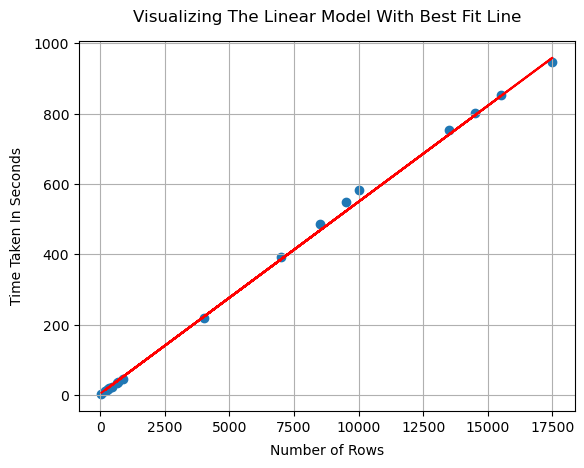

In [28]:
# Let's generate a best-fit line with testing data using the model coefficients and intercept
m = model.coef_
c = model.intercept_
line = m*X_test + c

# Plot the scatter plot and best-fit line
plt.scatter(X_test,y_test)
plt.plot(X_test, line, color='red')
plt.title("Visualizing The Linear Model With Best Fit Line", pad=14)
plt.xlabel(labelpad=7, xlabel="Number of Rows")
plt.ylabel(labelpad=7, ylabel="Time Taken In Seconds")
plt.grid()
plt.show()

By looking at the plot, we can make conclusion like, our model works well with testing data and able to predict the time required for extracting rows on different inputs. 

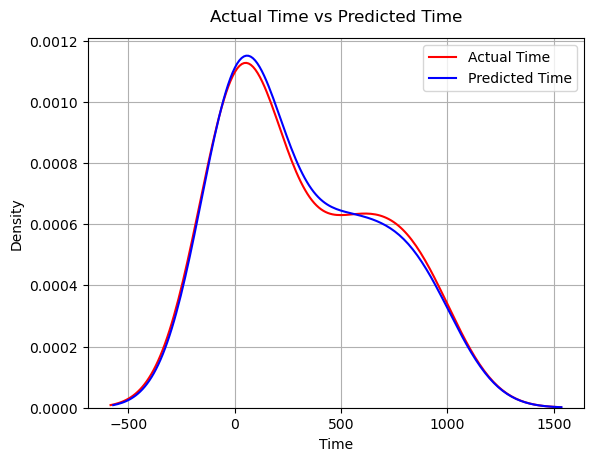

In [29]:
# Let's create the density plot for comparing the actual time vs predicted time
ax1 = sns.distplot(y_test, hist=False, color='red', label='Actual Time')
ax2 = sns.distplot(y_pred, hist=False, color='blue', label='Predicted Time', ax=ax1)
plt.title('Actual Time vs Predicted Time', pad=12)
plt.xlabel("Time")
plt.legend()
plt.grid()
plt.show()

By looking at the plot, we can make conclusion like, our model works well with testing data to predict the time required for extracting rows, and there not a huge difference in actual time and predicted time for extracting rows. This suggests that our linear regression model is effective at predicting row extraction times accurately.

In [30]:
# Let's create a function that convert string into timestamp 
def convert_to_timestamp(time_string):
    try:
        time_value = int(time_string)
        hours = time_value // 3600
        minutes = (time_value % 3600) // 60
        seconds = time_value % 60
        if hours != 0:
            return f"{hours:02d}:{minutes:02d}:{seconds:02d} hours."
        elif minutes != 0:
            return f"{hours:02d}:{minutes:02d}:{seconds:02d} minutes."
        else:
            return f"{hours:02d}:{minutes:02d}:{seconds:02d} seconds."
    except ValueError:
        # If time_string is not a valid integer, assume it is a timestamp string and return it unchanged
        return time_string

In [31]:
# Let's deploy our model to make prediction on different inputs
rows = int(input('Enter Number Of Rows :'))
pred = model.predict([[rows]])[0][0].round(2)
print(f"Time Taken for extracing {rows} rows is : {convert_to_timestamp(pred)}")

Enter Number Of Rows : 5000


Time Taken for extracing 5000 rows is : 00:04:36 minutes.


In [32]:
# Let's check the same values in our dataset to compare our model with original datasets
time_taken = convert_to_timestamp(df[df['number_of_rows'] == rows]['time_taken_in_seconds'].values[0])
print(f"Time Taken for extracing {rows} rows is : {time_taken}")

Time Taken for extracing 5000 rows is : 00:04:34 minutes.


There is slightly difference in predicted time and the actual recorded time which is just 2 seconds which will vary size of input and internet speed. This suggest that, our model is working perfect and predict accurate result.

In [33]:
# Let's convert 2d array into 1d array
X_test = [int(i) for i in X_test]
y_test = [int(i) for i in y_test]
y_pred = [float(i.round(2)) for i in y_pred]

# let's view our actual time vs predicted time using pandas dataframe
df_test = pd.DataFrame([X_test, y_test, y_pred], index=['number_of_rows', 'actual_time_in_seconds', 'predicted_time_in_seconds']).transpose()
df_test

,number_of_rows,actual_time_in_seconds,predicted_time_in_seconds
0,50.0,3.0,5.97
1,300.0,16.0,19.62
2,8500.0,487.0,467.56
3,700.0,36.0,41.47
4,13500.0,754.0,740.70
5,17500.0,947.0,959.20
6,10000.0,582.0,549.50
7,4000.0,218.0,221.74
8,14500.0,803.0,795.32
9,650.0,33.0,38.74


In [34]:
# Let's check our model with multiple inputs
for i in [10000, 40000, 100000, 150000, 350000, 1000000]: 
    print(f"To extract {i} rows it takes :",convert_to_timestamp(model.predict([[i]])[0][0].round(2)))

To extract 10000 rows it takes : 00:09:09 minutes.
To extract 40000 rows it takes : 00:36:28 minutes.
To extract 100000 rows it takes : 01:31:05 hours.
To extract 150000 rows it takes : 02:16:37 hours.
To extract 350000 rows it takes : 05:18:42 hours.
To extract 1000000 rows it takes : 15:10:29 hours.


We have successfully developed and deployed our machine learning model that able to predict the time required for extracting/scraping rows.

***

I have also deployed the model using flask that take rows input as argument and predict the time.

In [35]:
import requests
requests.get("http://127.0.0.1:5000/predict_time/50000").text

'It will take approximately 00:45:34 minutes to load 50000 rows.'

***